In [1]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import statsmodels.api as sm

In [2]:
df = pd.read_csv('data.csv',)
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y')
df.set_index('datetime', inplace=True)

<AxesSubplot:xlabel='datetime'>

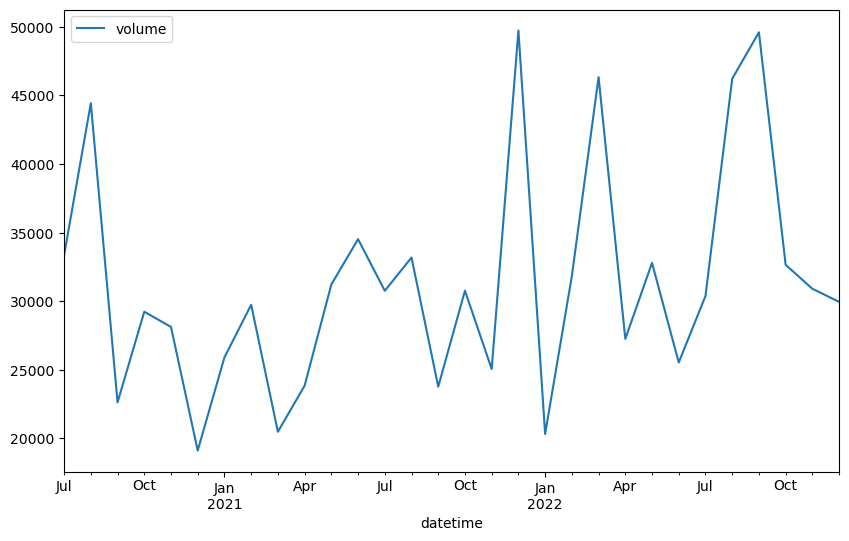

In [3]:
df.plot()

In [4]:
def test_stationarity(sales):
    result=adfuller(sales)
    labels = ['ADF Test statistic', 'p-value', '#Lags Used', 'Number of observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))

In [5]:
# Load data
indexedDataset = df.copy()
indexedDataset2 = df.copy()

In [6]:
df['sales_differences'] = df['volume'] - df['volume'].shift(5)

In [7]:
test_stationarity(df['sales_differences'].dropna())

ADF Test statistic : -3.8050409386636104
p-value : 0.0028561586444363174
#Lags Used : 5
Number of observations Used : 19


In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

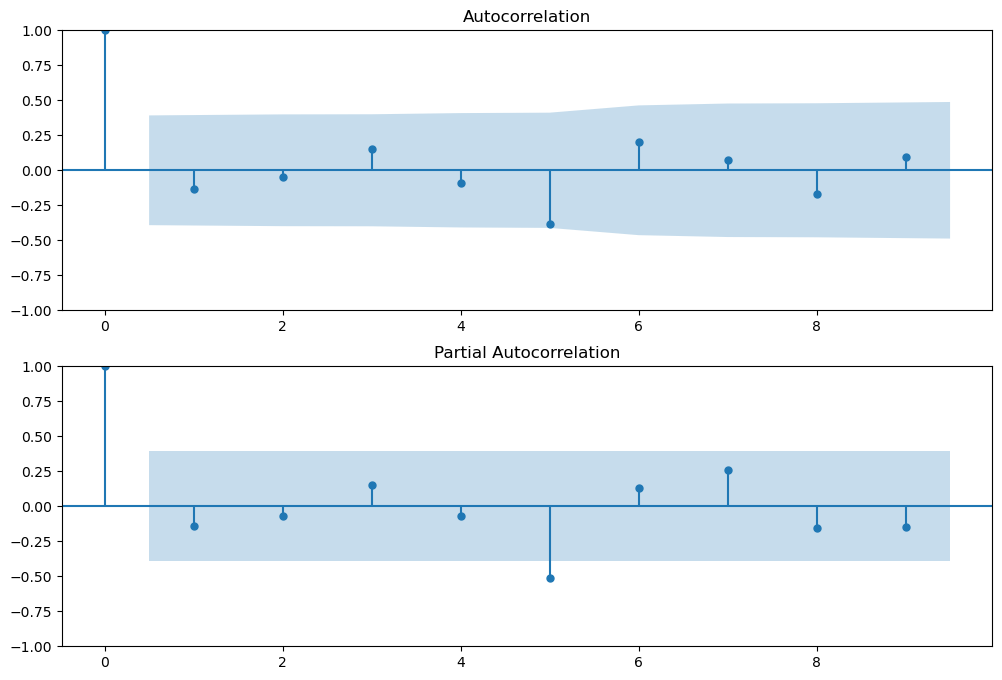

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['sales_differences'].dropna(), lags=9, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['sales_differences'].dropna(), lags=9, ax=ax2)

In [12]:
from statsmodels.tsa.arima.model import ARIMA

In [13]:
model = ARIMA(df['volume'], order = (2,2,2))


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 volume   No. Observations:                   30
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -299.497
Date:                Mon, 08 May 2023   AIC                            608.994
Time:                        21:18:26   BIC                            615.655
Sample:                    11-01-2011   HQIC                           611.030
                         - 04-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1231      0.270      0.456      0.648      -0.406       0.652
ar.L2         -0.3827      0.237     -1.618      0.106      -0.846       0.081
ma.L1         -1.9356      0.427     -4.535      0.000      -2.772      -1.099
ma.L2          0.9611      0.439      2.191      0.028       0.101       1.821
sigma2      1.062e+08   8.55e-09   1.24e+16      0.000    1.06e+08    1.06e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.45   Prob(JB):                         0.77
Heteroskedasticity (H):               0.52   Skew:                             0.26
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.3e+32. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='datetime'>

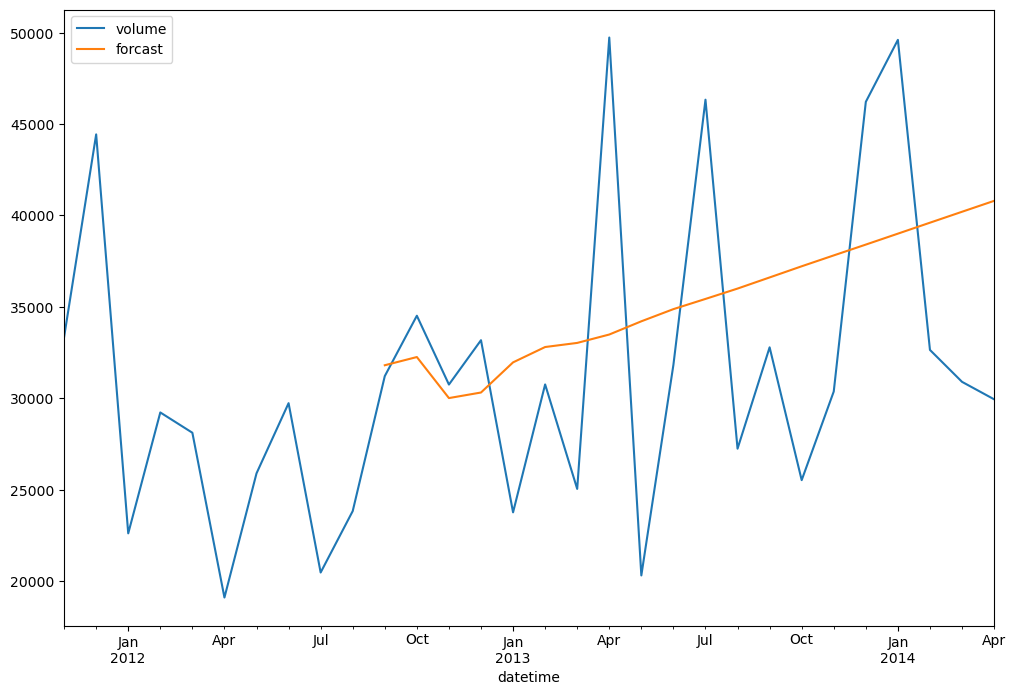

In [18]:
df['forcast']=model_fit.predict(start=10, end=200,dynamic=True)
df[['volume', 'forcast']].plot(figsize=(12,8))

In [19]:
model=sm.tsa.statespace.SARIMAX(df['volume'], order=(2,2,2), seasonal_order=(2,2,2,12))
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'

<AxesSubplot:xlabel='datetime'>

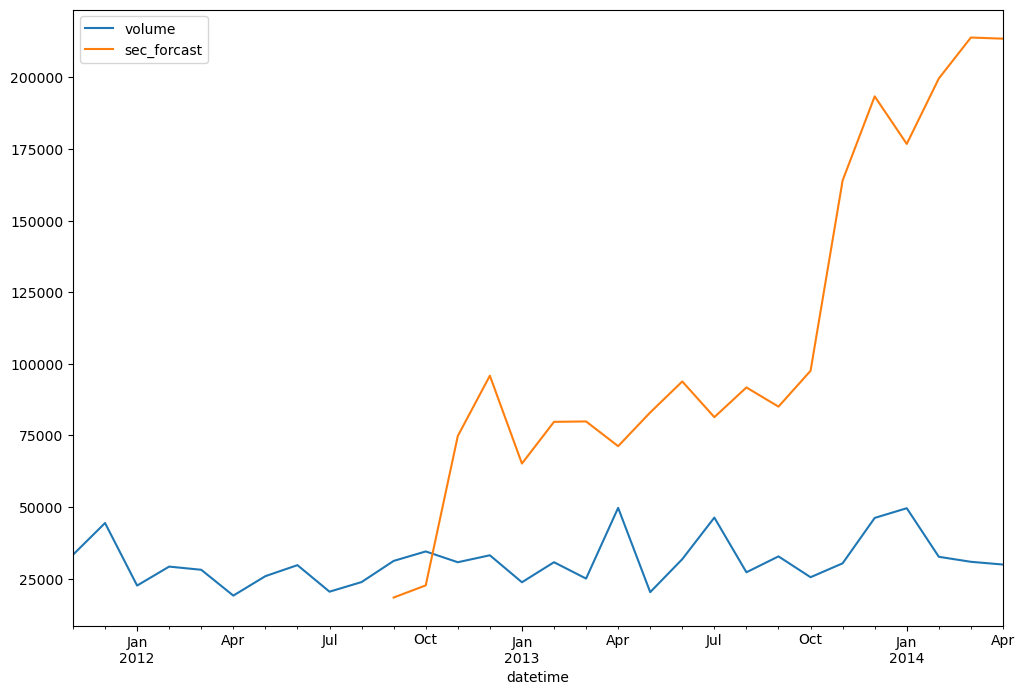

In [21]:
df['sec_forcast']=results.predict(start=10, end=200,dynamic=True)
df[['volume', 'sec_forcast']].plot(figsize=(12,8))